# Project Description: 
A project from Healthcare domain containing Medical Cost of people characterized by certain attributes.

# Context 
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have. 

# Data Description

The dataset consists of the following attributes:

**age:** This column contains the age of primary beneficiary values ranging from 18 to 64.

**sex:** It contains the gender of contractor - female or male.

**bmi:** It contains the Body Mass Index of the beneficiaries. Body Mass Index provides an understanding of body - weights that are relatively low or high relative to height. It is objective index of body weight (kg/m^2) using the ratio of height to weight. Ideally it should be between 18.5 to 24.9. Here, the value is ranging from 15.96 to 53.13.

**children:** It contains the number of children covered by health insurance. The number of children ranges from 0 to 5.

**smoker:** It contains whether the benificiary is Smoker or not.

**region:** It contains the beneficiary's residential area in the US. Here four regions are taken into consideration -  northeast, southeast, southwest, northwest.

**charges:** It contains the individual medical costs billed by health insurance.

#### 1. Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.proportion import proportions_ztest
import copy

%matplotlib inline

#### 2. Reading Data as a Dataframe

In [2]:
df_Insurance = pd.read_csv('insurance.csv')
df_Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Exploratory Data Analysis

#### 3a. Shape of the data

In [3]:
df_Insurance.shape

(1338, 7)

The two-dimensional dataframe i.e., df_Insurance consists of 1338 rows and 7 columns.

#### 3b. Data type of each attribute

In [4]:
df_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The attributes "age" and "children" contains values that are of integer types. The attributes "bmi" and "charges" contains values that are of floating types. The attributes "sex", "smoker" and "region" is of type object. Thus, in all there are 3 columns that have data object types, 2 have int and floating types each. Moreover, there are no attributes that have null data.

#### 3c. To check the presence of missing value

In [5]:
df_Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

None of the columns have null values.

#### 3d. 5 point summary of numerical attributes

In [6]:
df_Insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


The four numerical attributes can be summarised in the following manner:

i. **age** - There are 1338 records having a mean value of 39.207025. The minimum age of the primary beneficiary is 18 and the maximum age is 64. 25% of the people are below 27 years of age, 50 % of people are below 39 years of age and 75% of people are below 51 years of age. Also, the observations in "age" differ from the mean value by 14.049960

ii. **bmi** - There are 1338 records having a mean value of 30.663397. The least observed bmi is 15.96 and the maximum recorded observation is 53.13. 25% of people have bmi below 26.29625, 50% of people have a bmi below 30.4 and 75% of people have a bmi below 34.693750. Also, the observations in "bmi" differs from the mean value by 6.098187

iii. **children** - There are 1338 records having a mean value of 1.094918. The least number of children in the family is 0 whereas the maximum number of children in a family is 5. The 25th, 50th and 75th percentile value is 0, 1 and 2 respectively. Also, the observations in "children" differ from the mean value by 1.205493

iv. **charges** - There are 1338 records having a mean value of 13270.422265. The minimum amount of medical expenses billed by the health insurance is 1121.8739 whereas the maximum amount is 63770.42801. The 25th, 50th and 75th percentile values are 4740.28715, 9382.033 and 16639.912515 respectively. Also, the standard deviation for the observed records is 12110.011237.

#### 3e. Distribution of 'bmi', 'age' and 'charges' columns

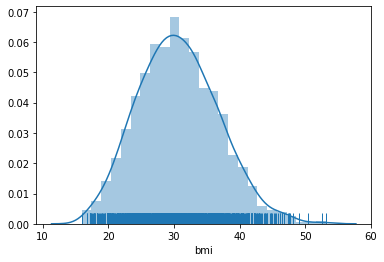

In [7]:
#plot of 'bmi'
sns.distplot(df_Insurance['bmi'], rug = True)

From the above plot it seems that the observations recorded in **'bmi'** is approximately Normally Distributed. Very less people with lower bmi exits. 

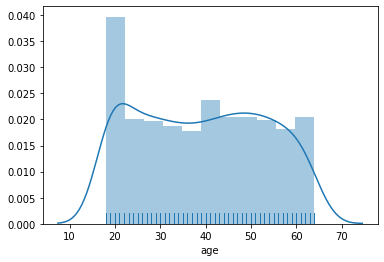

In [8]:
#plot of 'age'
sns.distplot(df_Insurance['age'], rug = True)

From the above plot it seems that the observations recorded in **'age'** is not normally distributed. The plot also presents a fact that the most participation is done by the age around 20 years old customers. 

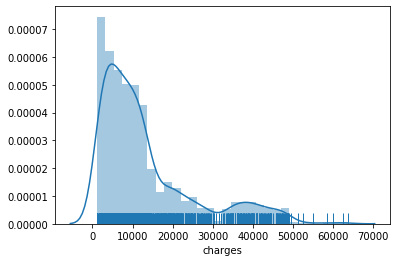

In [9]:
#plot for 'charges'
sns.distplot(df_Insurance['charges'], rug = True)

From the plot it is clear that **'charges'** is right skewed which suggests the fact that most number of individuals with lesser medical costs has been billed by insurance.

#### 3f. Measure of skewness of 'bmi', 'age' and 'charges' columns

In [10]:
#measure of skewness of 'bmi':
df_Insurance['bmi'].skew()

0.2840471105987448

Skewness of **'bmi'** is very less which was also clear from the plot as obtained above. 

In [11]:
# measure of skewness of 'age' :
df_Insurance['age'].skew()

0.05567251565299186

**'age'** is uniformally distributed which is also evident from its low skewness.

In [12]:
df_Insurance['charges'].skew()

1.5158796580240388

**'charges'** are right-skewed which was also evident from the above drawn distribution plot.

#### 3g. Checking the presence of outliers in 'bmi', 'age' and 'charges'

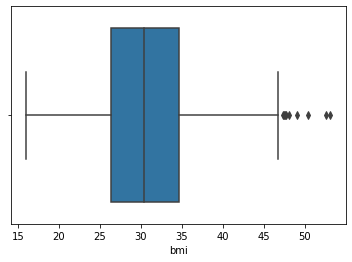

In [13]:
# presence of outliers in 'bmi' can be checked by 'boxplot'
sns.boxplot(df_Insurance['bmi'])

So, from the plot we can see that there are some outliers in **'bmi'**. Now the number of outliers in **'bmi'** can be calculated as mentioned below:

In [14]:
qb_25 = np.percentile(df_Insurance['bmi'], 25)
qb_75 = np.percentile(df_Insurance['bmi'], 75)
iqr_b = qb_75 - qb_25
cutoff_b = iqr_b * 1.5
low_lim_b = qb_25 - cutoff_b
upp_lim_b = qb_75 + cutoff_b

outlier_b = [x for x in df_Insurance['bmi'] if x < low_lim_b or x > upp_lim_b]
print("The number of outliers in 'bmi' out of 1338 records are:" , len(outlier_b))

The number of outliers in 'bmi' out of 1338 records are: 9


Thus, there are only 9 people having extreme bmis'.

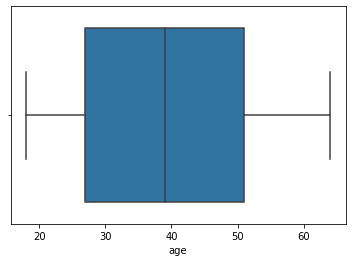

In [15]:
# presence of outliers in 'age' can be checked by 'boxplot'
sns.boxplot(df_Insurance['age'])

From the plot it is clear that the attribute **'age'** doesn't have any outliers in them. The same can be confirmed by mathematical calculation as shown below:

In [16]:
qa_25 = np.percentile(df_Insurance['age'], 25)
qa_75 = np.percentile(df_Insurance['age'], 75)
iqr_a = qa_75 - qa_25
cutoff_a = iqr_a * 1.5
low_lim_a = qa_25 - cutoff_a
upp_lim_a = qa_75 + cutoff_a

outlier_a = [x for x in df_Insurance['age'] if x < low_lim_a or x > upp_lim_a]
print("Out of 1338 records in 'age', the number of outliers are: ", len(outlier_a))

Out of 1338 records in 'age', the number of outliers are:  0


Thus, for **"age"** none of the entries are extreme values.

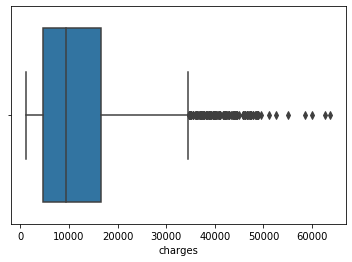

In [17]:
# presence of outliers in 'charges' can be perceived by boxplot
sns.boxplot(df_Insurance['charges'])

From the plot it is clear that for **'charges'** there are lot of outliers. The number of outliers can be calculated as shown below:

In [18]:
qc_25 = np.percentile(df_Insurance['charges'], 25)
qc_75 = np.percentile(df_Insurance['charges'], 75)
iqr_c = qc_75 - qc_25
cutoff_c = iqr_c * 1.5
low_lim_c = qc_25 - cutoff_c
upp_lim_c = qc_75 + cutoff_c

outlier_c = [x for x in df_Insurance['charges'] if x < low_lim_c or x > upp_lim_c]
print("Out of 1338 records in 'charges', the number of outliers are: ", len(outlier_c))

Out of 1338 records in 'charges', the number of outliers are:  139


Thus, there are 139 records in **"charges"** that are outliers.

#### 3h. Distribution of categorical columns (include children)

#### Univariate Analysis

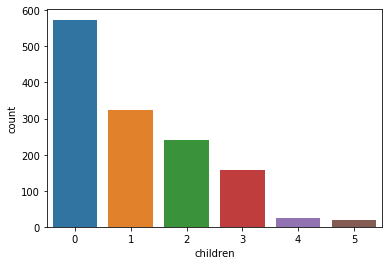

In [19]:
# plotting of children
sns.countplot(df_Insurance['children'])

From the plot it is inferred that the maximum number of recorded customers have no children.

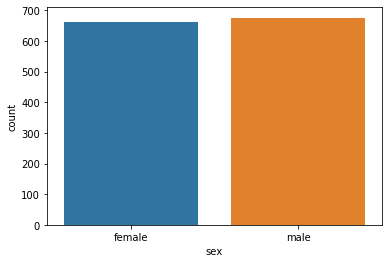

In [20]:
# plotting of 'sex'
sns.countplot(df_Insurance['sex'])

From the above plot it seems that the gender ratio is not significantly different.

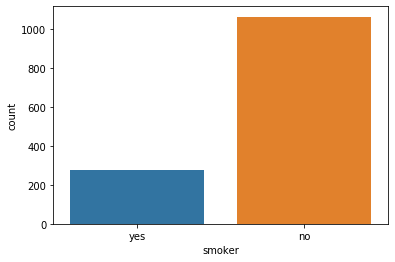

In [21]:
# plotting of 'smoker'
sns.countplot(df_Insurance['smoker'])

From the above plot it is evident that the count of non-smokers are quite high as compared to smokers.

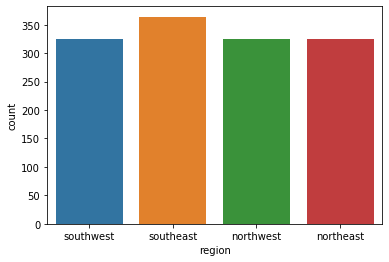

In [22]:
# plotting of 'region'
sns.countplot(df_Insurance['region'])

From the above plot it can be inferred that the maximum number of participants are from southeast region. Apart from that the number of participants from the other three regions (southwest, northwest and northeast) are more or less same.

#### Bivariate analysis

Here we will try to plot the three categorical variables one-by-one by also having 'children' as input (for colour appearance).

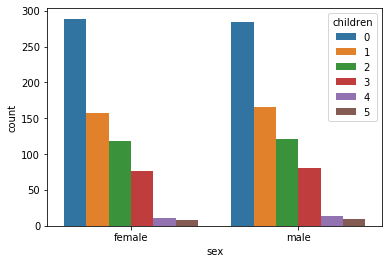

In [23]:
# plotting of 'sex' and 'children'
sns.countplot(df_Insurance['sex'], hue = df_Insurance['children'])

From the graph it is clear that the number of children associated with both of the genders is not significantly different.

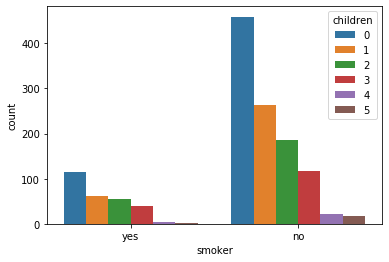

In [24]:
# plotting of 'smoker' and 'children'
sns.countplot(df_Insurance['smoker'], hue = df_Insurance['children'])

From the above graph it is clear that the number of children associated with smokers are significantly less than the number of children associated with non smokers.

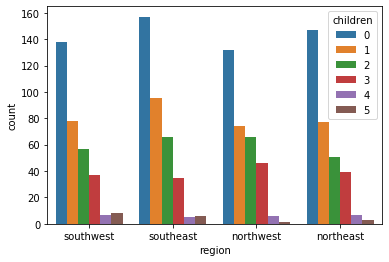

In [25]:
# plotting of 'region' and 'children'
sns.countplot(df_Insurance['region'], hue = df_Insurance['children'])

From the plot it is clear that in from of the region beneficiaries having no children are covered most.

Now we will try to plot the three categorical variables and children against 'charges' one-by-one.

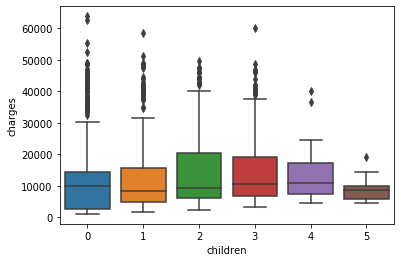

In [26]:
# plot of 'children' and 'charges'
sns.boxplot(x = 'children', y = 'charges', data = df_Insurance)

From the graph it is clear that the maximum charges are paid by customers having no children whereas least amount of charges are paid by customers having five children.

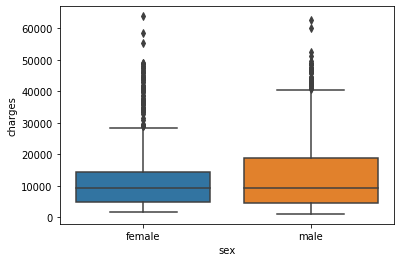

In [27]:
# plot of 'sex' and 'charges'
sns.boxplot(x = 'sex', y = 'charges', data = df_Insurance)

From the plot it seems the number of females paying extreme charges are more as compared to males. Also, it is evident that the plotting of males is right-skewed indicating that a maximum number of males pay higher charges.

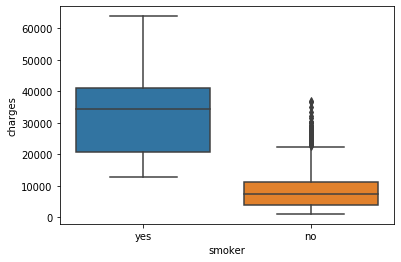

In [28]:
# plot of 'smoker' and 'charges'
sns.boxplot(x = 'smoker', y = 'charges', data = df_Insurance)

From the plot it is evident that the maximum charges are being paid by smokers. Also, it is evident that there exists a lot of non-smokers who pay higher charges as compared to other non-smokers. Moreover, as the plotting of people who smokes are left-skewed it indicates that a maximum number of smokers pay less charges as compared to other smokers.

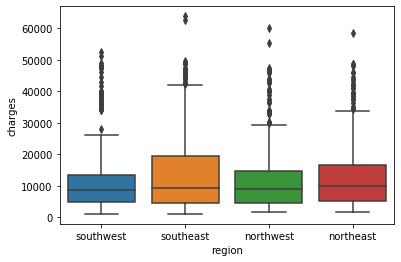

In [29]:
# plot of 'region' and 'charges'
sns.boxplot(x = 'region', y = 'charges', data = df_Insurance)

From the plot it is evident that the maximum charges are being paid by customers belonging from 'southeast' region.

#### 3i. Pairplot that includes all the columns of the data frame

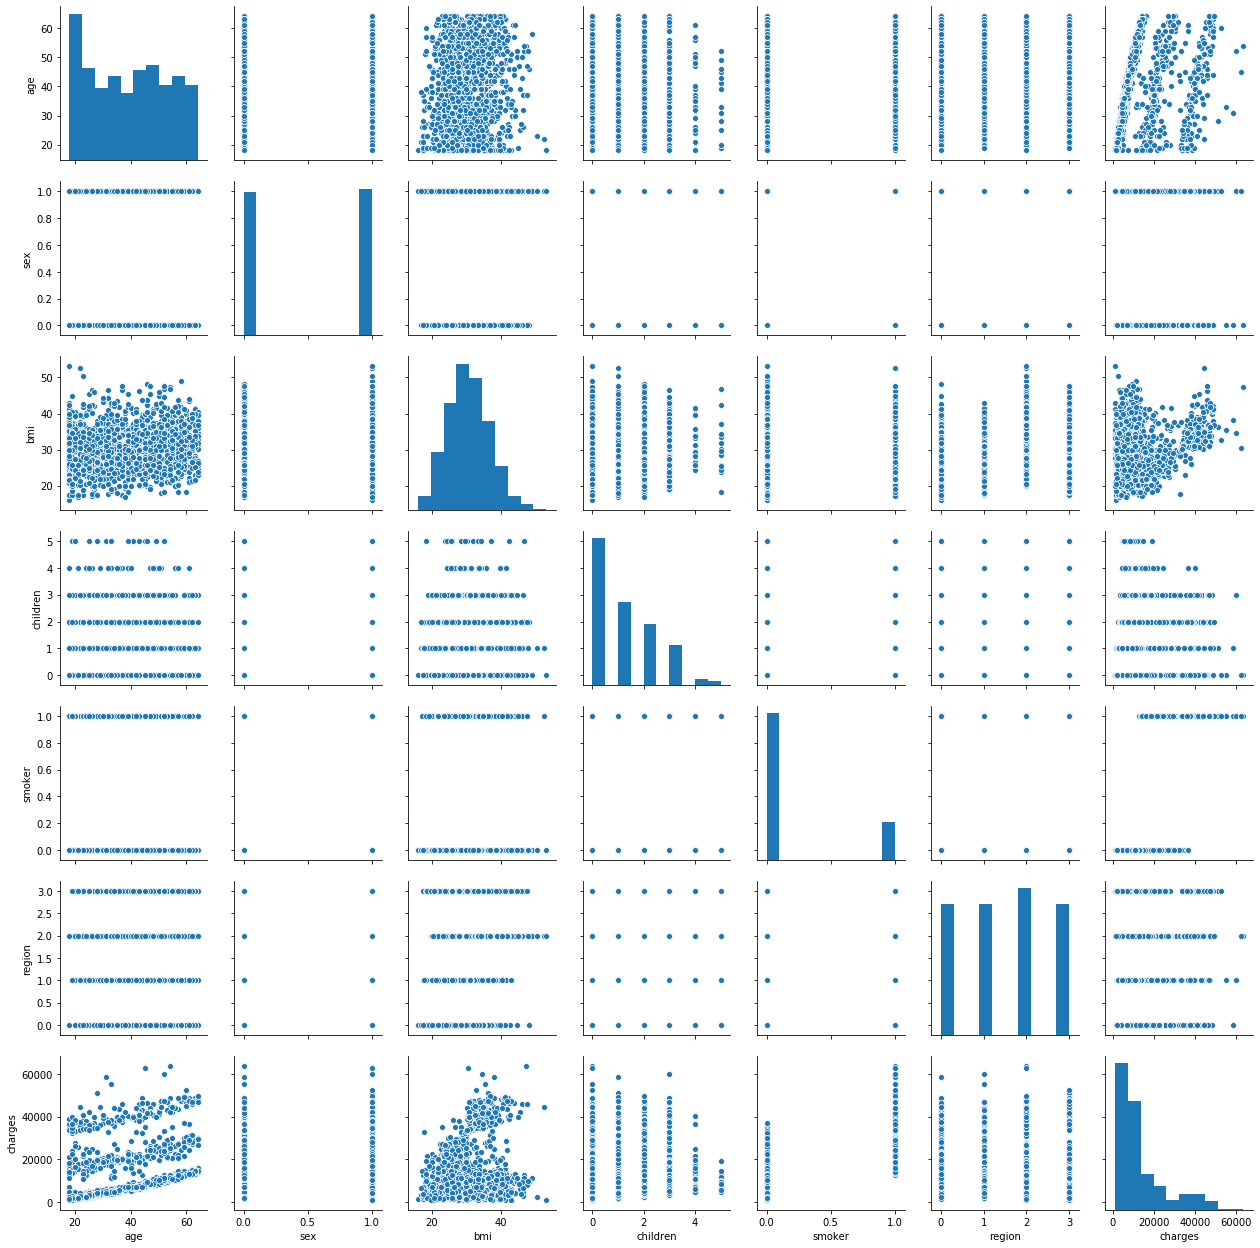

In [30]:
#We have to apply LabelEncoding here as pairplot ignores string attributes
df_insurance_encoded = copy.deepcopy(df_Insurance)
df_insurance_encoded.loc[:,['sex','smoker','region']] = df_Insurance.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)

sns.pairplot(df_insurance_encoded)

From the above plot it is clear that none of the above discussed attributes are strongly related with one another lineraly. The same fact can be supported by calculating the correlation value for the attributes and plotting a heat map:

In [31]:
#calculating the correlation coefficient
corr = df_insurance_encoded.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


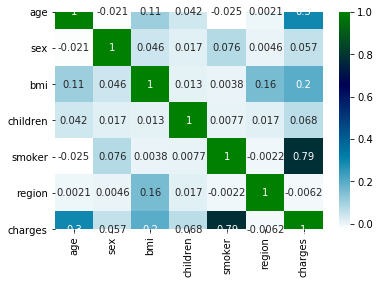

In [32]:
#plotting a heatmap
sns.heatmap(corr, annot = True, cmap = "ocean_r")

# 4. Statistical Analysis

#### 4a. Do charges of people who smoke differ significantly from the people that don't?

In [33]:
df_Insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Thus, out of 1338 individuals, 1064 individuals smokes whereas 274 individuals don't smoke. Now let us plot a scatterplot to see whether there is a dependency between the attributes **"charges"** and **"smoker"**.

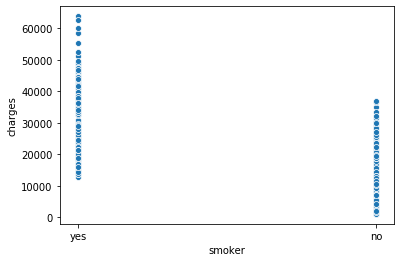

In [34]:
sns.scatterplot(df_Insurance['smoker'], df_Insurance['charges'])

Thus, from the plot it is clear that the individuals who are smokers are billed higher charges by the insurance as compared to the non-smokers. Simply, in other terms we can say that the charges paid by smokers and non-smokers are different.

This can be backed by statistical evidence. As, we have two variables here, lets try to prove the above fact by using T-test.
First of all lets state the null-hypothesis and alternative-hypothesis:

Ho (null hypothesis)       : **"Charges of smoker and non-smoker are same."**

Ha (alternative hypothesis): **"Charges of smoker and non-smoker are not same."**

In [35]:
df_smoker_charges = np.array(df_Insurance[df_Insurance['smoker'] == 'yes']['charges'])
df_non_smoker_charges = np.array(df_Insurance[df_Insurance['smoker'] == 'no']['charges'])

t_statistic, p_value = stats.ttest_ind(df_smoker_charges, df_non_smoker_charges)

print("p-value for the test is = ", p_value)

if p_value < 0.05: # Significance level is set at 5%
    print(f'As the p-value is {p_value} which is less than 0.05, so Null Hypothesis is rejected.')
else:
    print(f'As the p-value is {p_value} which is more than 0.05, so we fail to reject Null Hypothesis.')

p-value for the test is =  8.271435842177219e-283
As the p-value is 8.271435842177219e-283 which is less than 0.05, so Null Hypothesis is rejected.


Since the p-value is less than 0.05, **the null hypothesis is rejected**. This ascertains the fact that **the charges paid by smoker and non-smoker are different**. 

#### 4b. Does bmi of males differ significantly from that of females?

In [36]:
df_Insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Thus, out of 1338 individuals, there are 676 males and 662 females. Now let us plot a scatterplot to see whether there is a dependency between the attributes "sex" and "bmi".

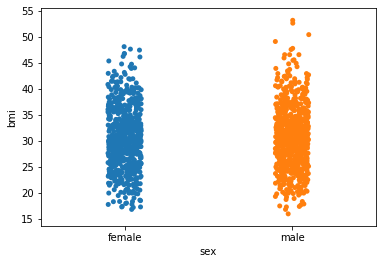

In [37]:
sns.stripplot(df_Insurance['sex'], df_Insurance['bmi'])

Thus, from the plot it is not clear that gender does not have any effect on bmi.

Now, lets try to ascertain this hypothesis using statistics. As, we have two variables here, lets try to prove the above fact by using T-test.
First of all lets state the null-hypothesis and alternative-hypothesis:

Ho (null hypothesis)       : **"Gender has no impact on bmi."**

Ha (alternative hypothesis): **"Gender has an impact on bmi."**

In [38]:
df_male_bmi = np.array(df_Insurance[df_Insurance['sex'] == 'male']['bmi'])
df_female_bmi = np.array(df_Insurance[df_Insurance['sex'] == 'female']['bmi'])

t_stat_sex_bmi, p_val_sex_bmi = stats.ttest_ind(df_male_bmi, df_female_bmi)

print("p-value for the test is = ", p_val_sex_bmi)

if p_val_sex_bmi < 0.05: # Significance level is set at 5%
    print(f'As the p-value is {p_val_sex_bmi} which is less than 0.05, so Null Hypothesis is rejected.')
else:
    print(f'As the p-value is {p_val_sex_bmi} which is more than 0.05, so we fail to reject Null Hypothesis.')

p-value for the test is =  0.08997637178984932
As the p-value is 0.08997637178984932 which is more than 0.05, so we fail to reject Null Hypothesis.


Thus, as null hypothesis is accepted which proves the fact that **Gender has no impact on bmi**.

#### 4c. Is the proportion of smokers significantly different in different genders?

In [39]:
pd.crosstab(df_Insurance['sex'], df_Insurance['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


So, in the given dataset out of 662 females - 115  females (17.37%) are smokers whereas 547 are non-smokers. Similarly, out of 676 males - 159 males (23.52%) are smokers and 517 are non-smokers. Now, let us plot a graph for the same attributes: **"smoker"** and **"sex"** (both are categorical variables).

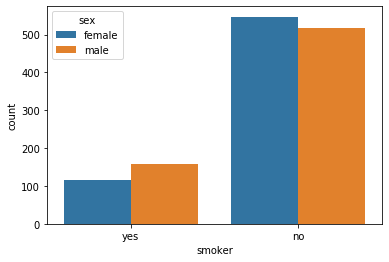

In [40]:
sns.countplot(df_Insurance['smoker'], hue = df_Insurance['sex'])

Thus, from the plot it is clear that the proportion of smokers in the female population is less than the male population.

But this difference in proportion (23.52% for males and 17.37% for females) whether does have any statistical importance or not can be determined by using Z-test. First of all lets state the null-hypothesis and alternative-hypothesis:

Ho (null hypothesis) : **"Proportion of female and male smokers are same."**

Ha (alternative hypothesis): **"Proportion of female and male smokers are not same."**

In [41]:
# to find out no of smokers in each gender
female_smokers = df_Insurance[df_Insurance['sex'] == 'female']['smoker'].value_counts()[1] 
male_smokers = df_Insurance[df_Insurance['sex'] == 'male']['smoker'].value_counts()[1]

# to find out no of male and females in the given data set
n_females = df_Insurance['sex'].value_counts()[1]
n_males = df_Insurance['sex'].value_counts()[0]

In [42]:
z_stat_sex_smok, p_val_sex_smok = proportions_ztest([female_smokers, male_smokers], [n_females, n_males])

print("p-value for this test is = ", p_val_sex_smok)
if p_val_sex_smok < 0.05: #Significance level is set at 5%
    print(f'As the p-value is {p_val_sex_smok} which is less than 0.05, so Null Hypothesis is rejected.')
else:
    print(f'As the p-value is {p_val_sex_smok} which is more than 0.05, so we fail to reject Null Hypothesis.')

p-value for this test is =  0.005324114164320532
As the p-value is 0.005324114164320532 which is less than 0.05, so Null Hypothesis is rejected.


As from statistical calculations, the fact that proportions of female and male smokers are same is rejected. Thus, **the proportion of male and female smokers differs significantly**.

#### 4d. Is the distribution of bmi across women with no children, one child and two children, the same? 

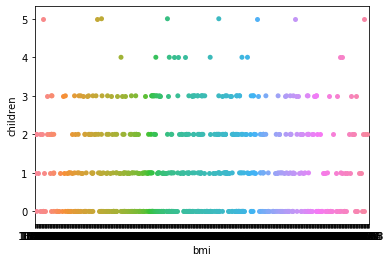

In [43]:
# here only records for sex = female is being considered:
sns.stripplot(df_Insurance['bmi'], df_Insurance[df_Insurance['sex'] == 'female']['children'])

From the graph it seems that the distribution of **'bmi'** are nearly same across women with 0, 1 or 2 children.

The fact can also be ascertained by using statistical principles. As, we have three variables here **"sex"**, **"children"** and **"bmi"** (out of which **"sex"** is a categorical attribute), here lets try to prove the above hypothesis by using ANOVA (One way ANOVA). First of all lets state the null-hypothesis and alternative-hypothesis:

Ho (null hypothesis) : **"No of children has no effect on bmi."**

Ha (alternative hypothesis): **"No of children has an effect on bmi."**

In [44]:
df_female = copy.deepcopy(df_Insurance[df_Insurance['sex'] == 'female'])

zero_child = df_female[df_female['children'] == 0]['bmi']
one_child = df_female[df_female['children'] == 1]['bmi']
two_child = df_female[df_female['children'] == 2]['bmi']

f_stat_bmi, p_val_bmi = stats.f_oneway(zero_child, one_child, two_child)

print("p-value for this test is = ", p_val_bmi)
if p_val_bmi < 0.05: # Significance level is set at 5%
    print(f'As the p-value is {p_val_bmi} which is less than 0.05, so Null Hypothesis is rejected.')
else:
    print(f'As the p-value is {p_val_bmi} which is more than 0.05, so we fail to reject Null Hypothesis.')

p-value for this test is =  0.7158579926754841
As the p-value is 0.7158579926754841 which is more than 0.05, so we fail to reject Null Hypothesis.


As, we had failed to reject the null hypothesis so we can say that **the distribution of bmi across women with no children, one child and two children are same**.